# 구글 마운트

In [123]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


# colab 한글깨짐 방지

In [124]:
# 코렙 한글깨짐 방지
!apt -qq -y install fonts-nanum > /dev/null

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


In [125]:
!pip install --upgrade joblib==1.1.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


# Global Variables

In [126]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/data/titanic/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.submission_csv = args.default_path+'submission.csv'

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

args.results

[]

# data proprocessing

In [127]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [128]:
train = pd.read_csv(args.train_csv)
test = pd.read_csv(args.test_csv)

train.shape, test.shape

((916, 12), (393, 11))

In [129]:
train.drop(['passengerid'], axis=1, inplace=True)

In [130]:

test.set_index(['passengerid'],inplace=True)

In [131]:
train.isna().sum()

survived      0
pclass        0
name          0
gender        0
age         180
sibsp         0
parch         0
ticket        0
fare          0
cabin       718
embarked      1
dtype: int64

In [132]:
test.isna().sum()

pclass        0
name          0
gender        0
age          83
sibsp         0
parch         0
ticket        0
fare          1
cabin       296
embarked      1
dtype: int64

In [133]:
train.head(10)

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
5,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
6,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
7,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
8,0,2,"de Brito, Mr. Jose Joaquim",male,32.0,0,0,244360,13.0000,NaN,S
9,0,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,NaN,S


In [134]:
test.head(10)

,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
921,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
922,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
923,3,"O'Keefe, Mr. Patrick",male,NaN,0,0,368402,7.7500,NaN,Q
924,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S


In [135]:
tr = train.copy()
te = test.copy()

tr.shape, te.shape

((916, 11), (393, 10))

In [136]:
y = train['survived']
X = train.drop(['survived'], axis=1)

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((641, 10), (275, 10), (641,), (275,))

In [139]:
combine = [X_train, X_test, test]

## data cleaning

In [140]:
X_train.drop(['cabin', 'ticket'], axis=1, inplace=True)
X_test.drop(['cabin', 'ticket'], axis=1, inplace=True)
test.drop(['cabin', 'ticket'], axis=1, inplace=True)

In [141]:
X_train['embarked'] =X_train['embarked'].fillna(X_train['embarked'].mode().values[0])
X_test['embarked'] =X_test['embarked'].fillna(X_train['embarked'].mode().values[0])

X_test['fare'] =X_test['fare'].fillna(X_train['fare'].mean())

# EDA

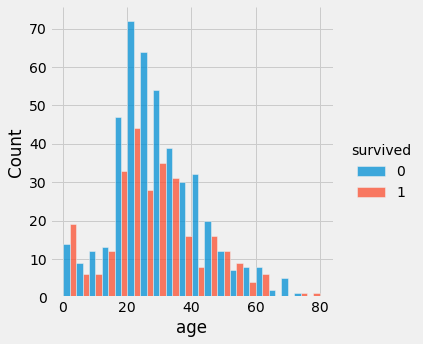

In [142]:
sns.displot(train, x='age', hue="survived", multiple="dodge", bins=20)

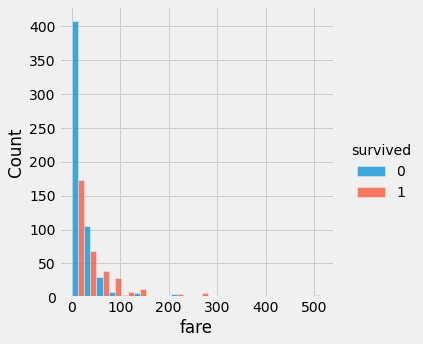

In [143]:
sns.displot(train, x='fare', hue="survived", multiple="dodge", bins=20)

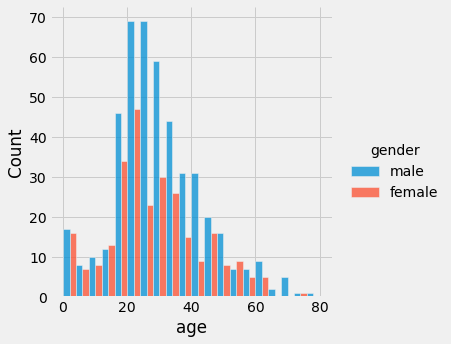

In [144]:
sns.displot(train, x="age", hue="gender", multiple="dodge", bins=20)

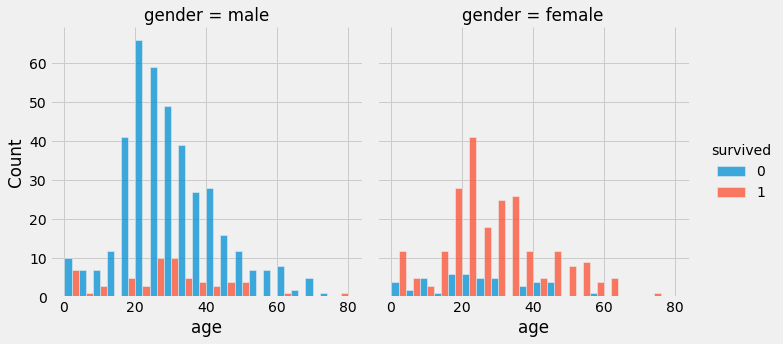

In [145]:
sns.displot(train, x="age", hue="survived", multiple="dodge", bins=20, col="gender")

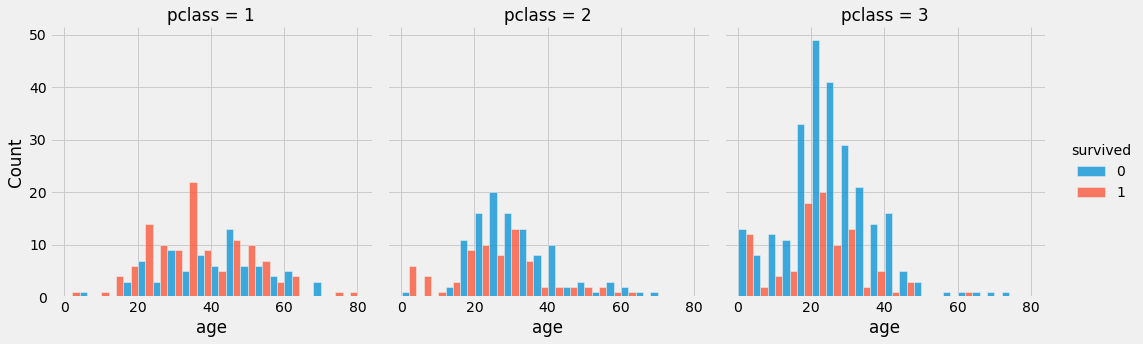

In [146]:
sns.displot(train, x='age', hue='survived', multiple="dodge", bins=20, col="pclass")

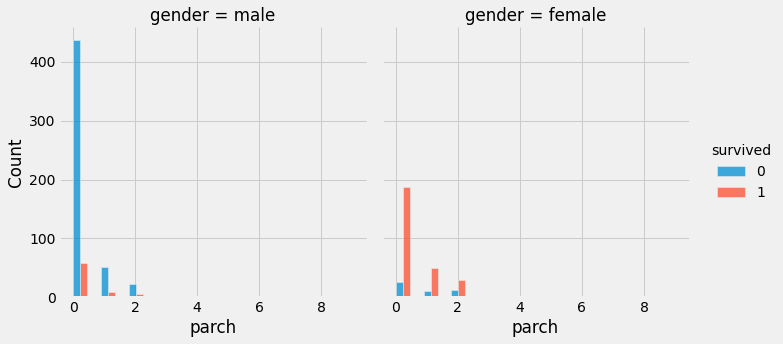

In [147]:
sns.displot(train, x="parch", hue="survived", multiple="dodge", bins=20, col="gender")

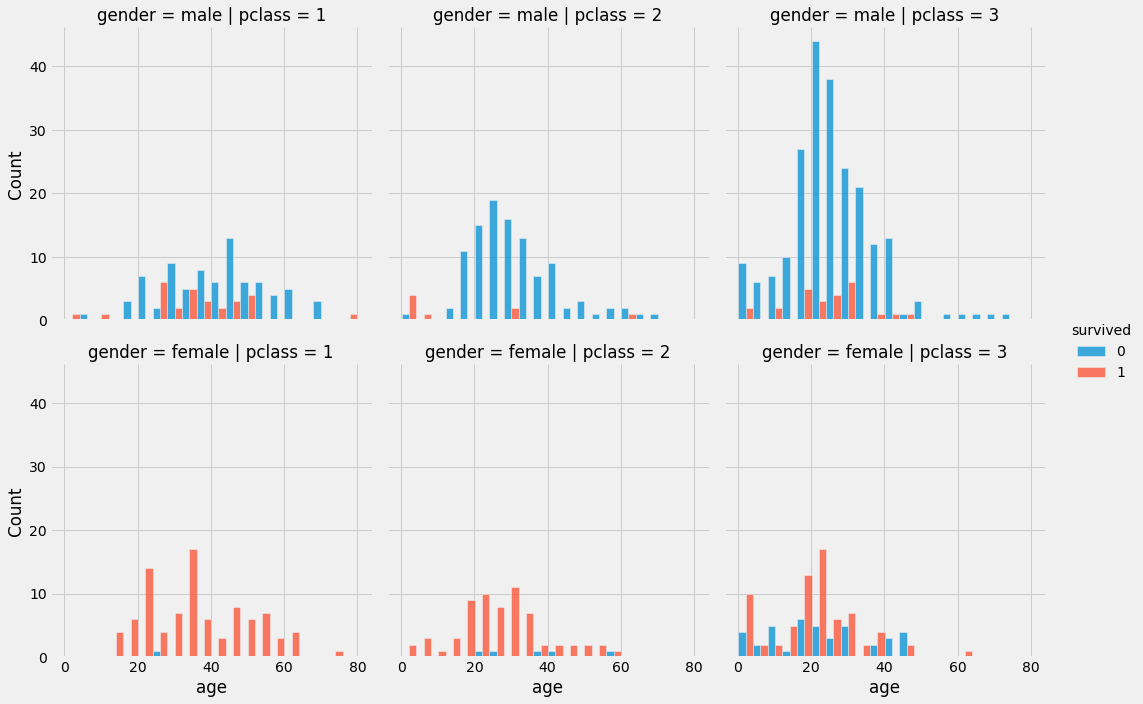

In [148]:
sns.displot(train, x="age", hue="survived", multiple="dodge", bins=20, col="pclass", row='gender')

In [149]:
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f1a79019790>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

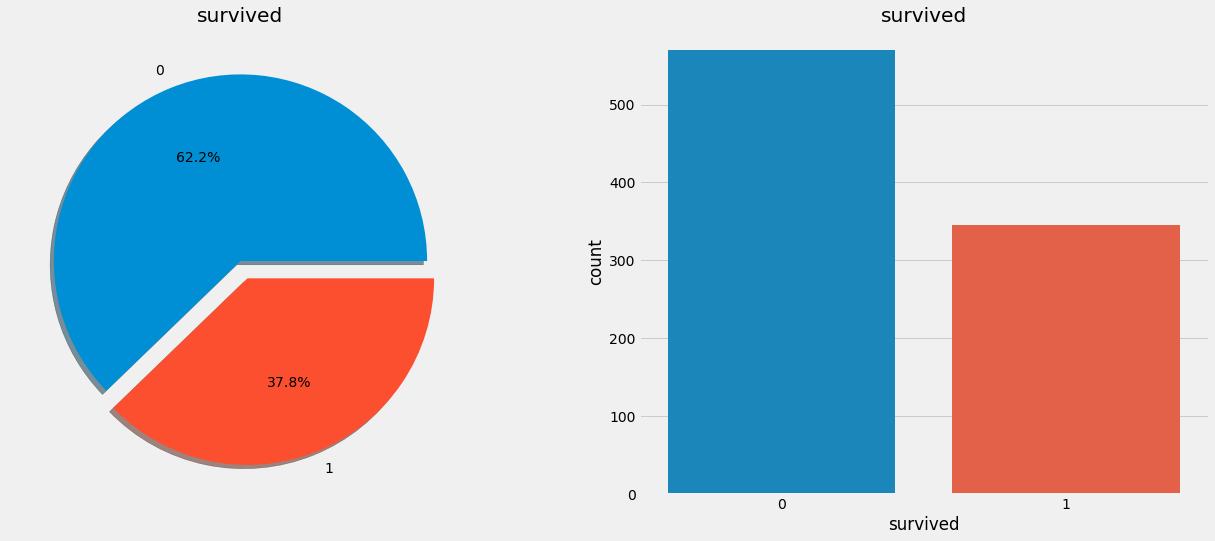

In [150]:
f,ax = plt.subplots(1, 2, figsize=(20, 8))
#survive value 세기, 
tr['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('survived')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('survived', data=tr, ax=ax[1])
ax[1].set_title('survived')
plt.show()

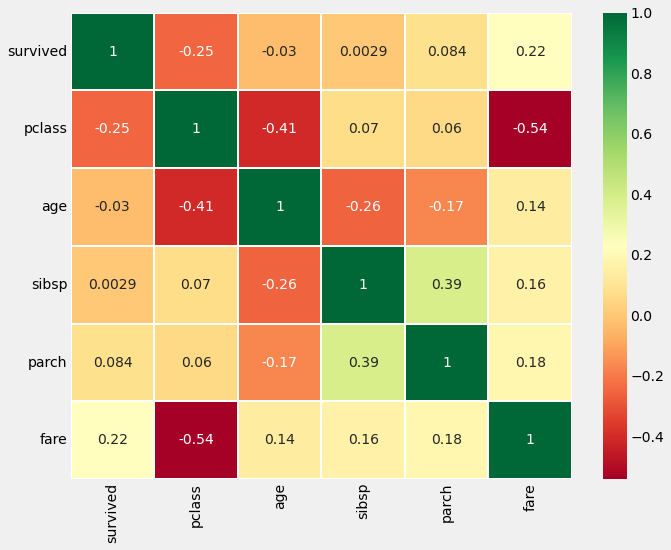

In [151]:
sns.heatmap(tr.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

> fare & pclass : fare가 높으면 pclass가 따라온다 = fare는 생존율에 영향을 미친다.

> parch & sibsp : 아예 혼자일때 생존율이 낮고 가족인 경우 생존율이 높다

> age & pclass : 나이와 pclass는 어느 정도 연관성이 존재한다.(나이가 적으면
pclass 분량이 적다.) = 나이는 생존율에 영향을 조금 미친다.

> gender & survived : 여자가 남자보다 많이 survived 했다. 



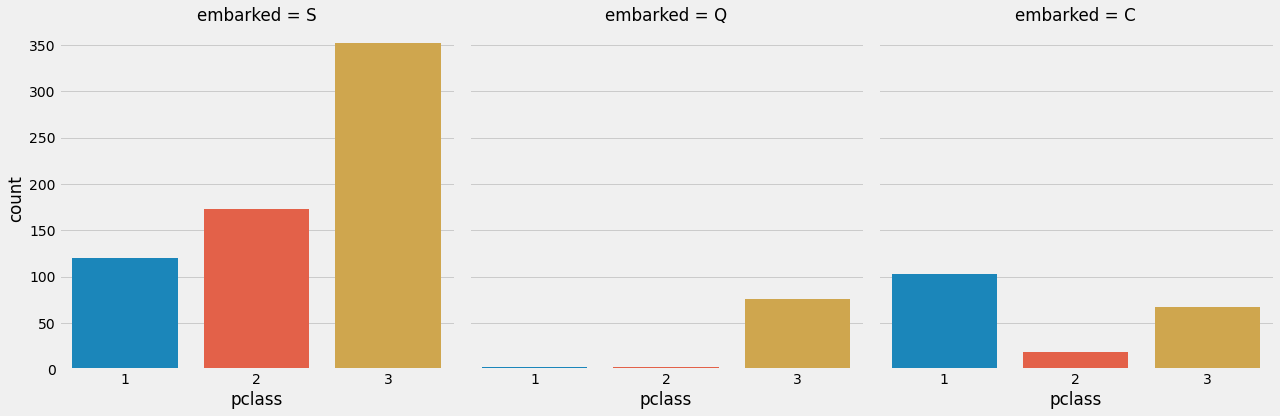

In [152]:
sns.catplot(x="pclass", data=train, height=6, kind="count", col='embarked')

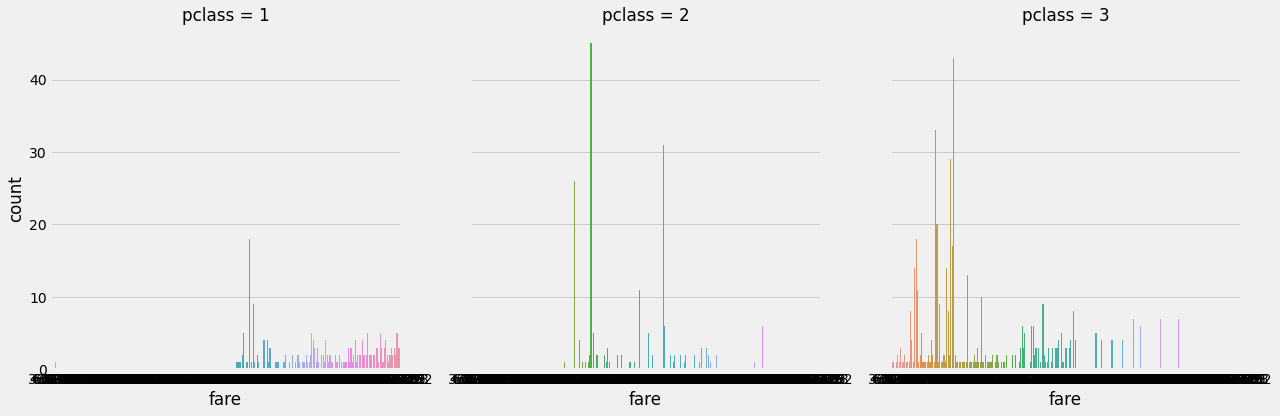

In [153]:
sns.catplot(x="fare", data=train, height=6, kind="count", col='pclass')

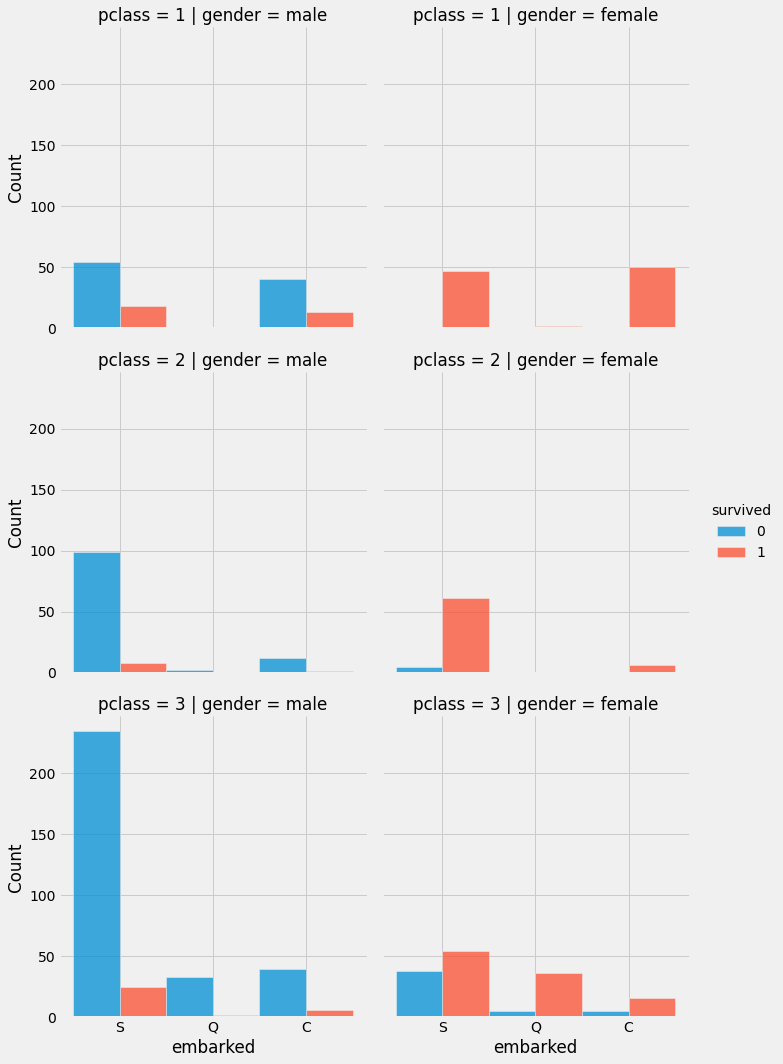

In [154]:
sns.displot(train, x="embarked", hue="survived", multiple="dodge", bins=20, col="gender", row='pclass')

> embarked는 상관관계가 있는가 ? : 상대적으로 S의 생존률은 낮고, Q와 C의 생존률은 높지만 Q와 C의 남자들은 거의 죽었고 여자들은 거의 살았다.

> 자리에 상관없이 여자의 생존률에 가중치를 더 주면 될 듯 함 

<AxesSubplot:xlabel='age', ylabel='Density'>

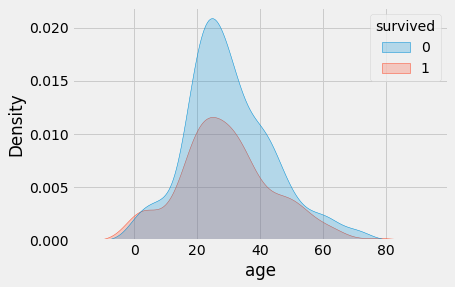

In [155]:
sns.kdeplot(data=train, x='age', hue='survived', fill=True)

In [156]:
train.groupby('pclass', as_index=False).mean()

,pclass,survived,age,sibsp,parch,fare
0,1,0.577093,38.697563,0.436123,0.295154,83.745613
1,2,0.391753,29.844262,0.386598,0.319588,20.388036
2,3,0.280808,24.643483,0.587879,0.408081,13.566363


In [157]:
train.groupby('parch', as_index=False).mean()

,parch,survived,pclass,age,sibsp,fare
0,0,0.346968,2.283498,31.966364,0.249647,27.058468
1,1,0.487603,2.256198,23.046460,1.082645,43.902169
2,2,0.500000,2.371429,18.750000,2.057143,59.758929
3,3,0.500000,2.000000,41.833333,1.166667,105.875000
4,4,0.250000,3.000000,38.000000,0.500000,25.585425
5,5,0.333333,3.000000,39.333333,0.333333,33.400000
6,6,0.000000,3.000000,41.500000,1.000000,46.900000
7,9,1.000000,3.000000,NaN,1.000000,69.550000


> age 결측치가 너무 많아서 잘 채워넣어야 됨. 어떤 방식으로 채울까?(임시)

In [158]:
def fill_age(colls):
    age = colls[0]
    pclass = colls[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age

X_train.age = X_train[['age', 'pclass']].apply(fill_age, axis=1)
X_test.age = X_test[['age', 'pclass']].apply(fill_age, axis=1)
test.age = test[['age', 'pclass']].apply(fill_age, axis=1)

X_train.isna().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [159]:
X_train['family'] = X_train['sibsp'] + X_train['parch']
X_test['family'] = X_test['sibsp'] + X_test['parch']
test['family'] = test['sibsp'] + test['parch']
X_train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,family
795,3,"Barry, Miss. Julia",female,27.0,0,0,7.8792,Q,0
538,3,"Salander, Mr. Karl Johan",male,24.0,0,0,9.3250,S,0
302,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,13.5000,S,0
447,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,61.1750,S,1
688,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,7.9250,S,0


In [160]:
X_train.loc[X_train['family'] > 0, 'family'] = 1
X_test.loc[X_test['family'] > 0, 'family'] = 1
test.loc[test['family'] > 0, 'family'] = 1

In [161]:
X_train['alone'] = 0
X_test['alone'] = 0
test['alone'] = 0

X_train.loc[X_train['family'] == 0, 'alone'] = 1
X_test.loc[X_test['family'] == 0, 'alone'] = 1
test.loc[test['family'] == 0, 'alone'] = 1

X_train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,family,alone
795,3,"Barry, Miss. Julia",female,27.0,0,0,7.8792,Q,0,1
538,3,"Salander, Mr. Karl Johan",male,24.0,0,0,9.3250,S,0,1
302,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,13.5000,S,0,1
447,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,61.1750,S,1,0
688,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,7.9250,S,0,1


In [162]:
for dataset in combine:
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand =False)
    
pd.crosstab(X_train['title'], X_train['gender'])
# crosstab (index, columns)

gender,female,male
title,,
Col,0,3
Countess,1,0
Don,0,1
Dr,1,1
Major,0,1
Master,0,25
Miss,137,0
Mr,0,369
Mrs,95,0


In [163]:
for dataset in combine:
    dataset['title'] = dataset['title'].replace(['Lady', 'Capt', 'Col', 'Don',
                                                 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['title'] = dataset['title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['title'] = dataset['title'].replace('Mile', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    dataset['title'] = dataset['title'].replace('Mlle', 'Mrs')

In [164]:
title_mapping = {'Mr': 0 , 'Miss': 1, 'Mrs': 2, 'Master':3, 'Royal': 4, 'Rare': 5}
for dataset in combine:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)
    
X_train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,family,alone,title
795,3,"Barry, Miss. Julia",female,27.0,0,0,7.8792,Q,0,1,1
538,3,"Salander, Mr. Karl Johan",male,24.0,0,0,9.3250,S,0,1,0
302,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,13.5000,S,0,1,0
447,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,61.1750,S,1,0,0
688,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,7.9250,S,0,1,1


In [165]:
X_train['gender_pclass'] = X_train.apply(lambda row: row['gender']+'_'+str(row['pclass']), axis=1)
X_test['gender_pclass'] = X_test.apply(lambda row: row['gender']+'_'+str(row['pclass']), axis=1)
test['gender_pclass'] = test.apply(lambda row: row['gender']+'_'+str(row['pclass']), axis=1)

X_train.shape, X_test.shape, test.shape

((641, 12), (275, 12), (393, 12))

In [166]:
print(f"{X_train['gender_pclass'].nunique()} / \n {X_train['gender_pclass'].unique()} \n")

6 / 
 ['female_3' 'male_3' 'male_2' 'male_1' 'female_1' 'female_2'] 



In [167]:
X_train['gender_family'] = X_train.apply(lambda row: row['gender']+'_'+str(row['family']), axis=1)
X_test['gender_family'] = X_test.apply(lambda row: row['gender']+'_'+str(row['family']), axis=1)
test['gender_family'] = test.apply(lambda row: row['gender']+'_'+str(row['family']), axis=1)

X_train.shape, X_test.shape, test.shape

((641, 13), (275, 13), (393, 13))

In [168]:
print(f"{X_train['gender_family'].nunique()} / \n {X_train['gender_family'].unique()} \n")

4 / 
 ['female_0' 'male_0' 'male_1' 'female_1'] 



In [169]:
X_train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,family,alone,title,gender_pclass,gender_family
795,3,"Barry, Miss. Julia",female,27.0,0,0,7.8792,Q,0,1,1,female_3,female_0
538,3,"Salander, Mr. Karl Johan",male,24.0,0,0,9.3250,S,0,1,0,male_3,male_0
302,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,13.5000,S,0,1,0,male_2,male_0
447,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,61.1750,S,1,0,0,male_1,male_1
688,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,7.9250,S,0,1,1,female_3,female_0


In [170]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}

X_train['embarked'] = X_train['embarked'].map(embarked_mapping)
X_test['embarked'] = X_test['embarked'].map(embarked_mapping)
test['embarked']=test['embarked'].map(embarked_mapping)

X_train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,family,alone,title,gender_pclass,gender_family
795,3,"Barry, Miss. Julia",female,27.0,0,0,7.8792,2,0,1,1,female_3,female_0
538,3,"Salander, Mr. Karl Johan",male,24.0,0,0,9.3250,0,0,1,0,male_3,male_0
302,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,13.5000,0,0,1,0,male_2,male_0
447,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,61.1750,0,1,0,0,male_1,male_1
688,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,7.9250,0,0,1,1,female_3,female_0


In [171]:
gender_mapping = {'male': 0 , 'female':1}

X_train['gender']=X_train['gender'].map(gender_mapping)
X_test['gender']=X_test['gender'].map(gender_mapping)
test['gender']=test['gender'].map(gender_mapping)

X_train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,family,alone,title,gender_pclass,gender_family
795,3,"Barry, Miss. Julia",1,27.0,0,0,7.8792,2,0,1,1,female_3,female_0
538,3,"Salander, Mr. Karl Johan",0,24.0,0,0,9.3250,0,0,1,0,male_3,male_0
302,2,"Sjostedt, Mr. Ernst Adolf",0,59.0,0,0,13.5000,0,0,1,0,male_2,male_0
447,1,"Chaffee, Mr. Herbert Fuller",0,46.0,1,0,61.1750,0,1,0,0,male_1,male_1
688,3,"Heininen, Miss. Wendla Maria",1,23.0,0,0,7.9250,0,0,1,1,female_3,female_0


In [172]:
X_test.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,family,alone,title,gender_pclass,gender_family
380,3,"Sage, Mrs. John (Annie Bullen)",1,24.0,1,9,69.5500,0,1,0,2,female_3,female_1
879,3,"Van Impe, Miss. Catharina",1,10.0,0,2,24.1500,0,1,0,1,female_3,female_1
355,3,"Boulos, Master. Akar",0,6.0,1,1,15.2458,1,1,0,3,male_3,male_1
357,1,"Reuchlin, Jonkheer. John George",0,38.0,0,0,0.0000,0,0,1,5,male_1,male_0
362,3,"Asplund, Master. Clarence Gustaf Hugo",0,9.0,4,2,31.3875,0,1,0,3,male_3,male_1


In [173]:
test.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,family,alone,title,gender_pclass,gender_family
passengerid,,,,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",1,15.0,0,0,8.0292,2.0,0,1,1,female_3,female_0
917,2,"Pinsky, Mrs. (Rosa)",1,32.0,0,0,13.0000,0.0,0,1,2,female_2,female_0
918,3,"McCarthy, Miss. Catherine Katie""""",1,24.0,0,0,7.7500,2.0,0,1,1,female_3,female_0
919,3,"Franklin, Mr. Charles (Charles Fardon)",0,24.0,0,0,7.2500,0.0,0,1,0,male_3,male_0
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",1,45.0,1,1,164.8667,0.0,1,0,2,female_1,female_1


In [174]:
X_train.drop(['name'], axis=1)
X_test.drop(['name'], axis=1)
test.drop(['name'], axis=1)

,pclass,gender,age,sibsp,parch,fare,embarked,family,alone,title,gender_pclass,gender_family
passengerid,,,,,,,,,,,,
916,3,1,15.0,0,0,8.0292,2.0,0,1,1,female_3,female_0
917,2,1,32.0,0,0,13.0000,0.0,0,1,2,female_2,female_0
918,3,1,24.0,0,0,7.7500,2.0,0,1,1,female_3,female_0
919,3,0,24.0,0,0,7.2500,0.0,0,1,0,male_3,male_0
920,1,1,45.0,1,1,164.8667,0.0,1,0,2,female_1,female_1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,1,24.0,0,0,7.7500,2.0,0,1,1,female_3,female_0
1305,1,1,16.0,0,1,57.9792,1.0,1,0,1,female_1,female_1
1306,3,1,13.0,0,0,7.2292,1.0,0,1,1,female_3,female_0


> 생각나는 것 : gender_fare, gender_pclass, parch_sibsp, age_pclass, pclass_embarked, name 바꿔주기

# encoding

In [175]:
enco_tr = pd.DataFrame()
enco_te = pd.DataFrame()

features_tr = X_train
features_te = X_test

cols_encoding = ['pclass','embarked','gender','family','sibsp','parch', 'gender_pclass', 'gender_family']
tmp_tr = X_train[cols_encoding]
tmp_te = X_test[cols_encoding]

enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

In [176]:
from sklearn.preprocessing import OneHotEncoder

In [177]:
enc = OneHotEncoder(handle_unknown = 'ignore')

# train
tmp_tr = pd.DataFrame(
    enc.fit_transform(X_train[cols_encoding]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_tr = pd.concat(
    [X_train.reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
)
# test
tmp_te = pd.DataFrame(
    enc.transform(X_test[cols_encoding]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [X_test.reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
# ori_test
tmp_te = pd.DataFrame(
    enc.transform(test[cols_encoding]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [test.reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)

print(f'after: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te.shape}')
enc_tr.head()

after: (641, 47) / (275, 47) / (393, 47)


,pclass,name,gender,age,sibsp,parch,fare,embarked,family,alone,...,gender_pclass_female_1,gender_pclass_female_2,gender_pclass_female_3,gender_pclass_male_1,gender_pclass_male_2,gender_pclass_male_3,gender_family_female_0,gender_family_female_1,gender_family_male_0,gender_family_male_1
0,3,"Barry, Miss. Julia",1,27.0,0,0,7.8792,2,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,"Salander, Mr. Karl Johan",0,24.0,0,0,9.3250,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,"Sjostedt, Mr. Ernst Adolf",0,59.0,0,0,13.5000,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,"Chaffee, Mr. Herbert Fuller",0,46.0,1,0,61.1750,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,"Heininen, Miss. Wendla Maria",1,23.0,0,0,7.9250,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [178]:
enc_ori_te.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,family,alone,...,gender_pclass_female_1,gender_pclass_female_2,gender_pclass_female_3,gender_pclass_male_1,gender_pclass_male_2,gender_pclass_male_3,gender_family_female_0,gender_family_female_1,gender_family_male_0,gender_family_male_1
0,3,"McGowan, Miss. Anna ""Annie""",1,15.0,0,0,8.0292,2.0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,"Pinsky, Mrs. (Rosa)",1,32.0,0,0,13.0000,0.0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,"McCarthy, Miss. Catherine Katie""""",1,24.0,0,0,7.7500,2.0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,"Franklin, Mr. Charles (Charles Fardon)",0,24.0,0,0,7.2500,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",1,45.0,1,1,164.8667,0.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [179]:
enc_ori_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pclass                  393 non-null    int64  
 1   name                    393 non-null    object 
 2   gender                  393 non-null    int64  
 3   age                     393 non-null    float64
 4   sibsp                   393 non-null    int64  
 5   parch                   393 non-null    int64  
 6   fare                    392 non-null    float64
 7   embarked                392 non-null    float64
 8   family                  393 non-null    int64  
 9   alone                   393 non-null    int64  
 10  title                   393 non-null    int64  
 11  gender_pclass           393 non-null    object 
 12  gender_family           393 non-null    object 
 13  pclass_1                393 non-null    float64
 14  pclass_2                393 non-null    fl

In [180]:
enc_tr.drop(['name', 'gender_pclass', 'gender_family'], axis=1,inplace=True)
enc_te.drop(['name','gender_pclass', 'gender_family'], axis=1,inplace=True)
enc_ori_te.drop(['name','gender_pclass', 'gender_family'], axis=1,inplace=True)

In [181]:
enc_tr.shape, enc_te.shape, enc_ori_te.shape

((641, 44), (275, 44), (393, 44))

In [182]:
y_train.shape, y_test.shape

((641,), (275,))

# 모델(앙상블)

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [184]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42).fit(enc_tr, y_train) 
preds = dtc.predict(enc_te)

dtc.score(enc_tr,y_train) , dtc.score(enc_te,y_test)

(0.984399375975039, 0.8036363636363636)

In [185]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier (random_state=42).fit(enc_tr, y_train)
preds =  rfc.predict(enc_te)

rfc.score(enc_tr,y_train) , rfc.score(enc_te,y_test)

(0.984399375975039, 0.8363636363636363)

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

hp = {
    "random_state" : 0,
    "max_depth" : 1,
    "n_estimators" : 100,
    "learning_rate" : 0.2,
}

gradient = GradientBoostingClassifier(**hp).fit(enc_tr, y_train)
print(f'훈련용 평가지표: {gradient.score(enc_tr, y_train)} / 테스트용 평가지표: {gradient.score(enc_te, y_test)}')

훈련용 평가지표: 0.875195007800312 / 테스트용 평가지표: 0.8836363636363637


In [187]:
from xgboost import XGBClassifier,plot_importance

hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 100,
    "learning_rate": 0.01
}

xgb = XGBClassifier(**hp).fit(enc_tr, y_train)
print(f'훈련용 평가지표: {xgb.score(enc_tr, y_train)} / 테스트용 평가지표: {xgb.score(enc_te, y_test)}')

훈련용 평가지표: 0.8533541341653667 / 테스트용 평가지표: 0.88


In [188]:
from lightgbm import LGBMClassifier,plot_importance

hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 100,
    "learning_rate": 0.01
}

lgb = LGBMClassifier(**hp).fit(enc_tr, y_train)
print(f'훈련용 평가지표: {lgb.score(enc_tr, y_train)} / 테스트용 평가지표: {lgb.score(enc_te, y_test)}')

훈련용 평가지표: 0.8533541341653667 / 테스트용 평가지표: 0.88


## 심화(교차 검증)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
# 모델 정의

# 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=0)


In [ ]:
#자세히
n_iter = 0
accuracy_lst = []

for train_index, valid_index in kf.split(X_train):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = X_train[train_index], X_train[valid_index]
  train_y, valid_y = y_train[train_index], y_train[valid_index]
  # 학습
  clf.fit(train_x, train_y)
  # 예측
  pred = clf.predict(valid_x)
  # 평가
  accuracy = np.round(accuracy_score(valid_y, pred), 4)
  accuracy_lst.append(accuracy)
  print(f'{n_iter} 번째 K-fold 정확도: {accuracy}, 학습데이터 크기: {train_x.shape}, 검증데이터 크기: {valid_x.shape}')

# 최종 평가
print('-'*50)
print(f'교차 검증 정확도: {np.mean(accuracy_lst)} / 모델 평가: {clf.score(X_test, y_test)}')

## 심화 (HPO.gridsearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hp={
    "max_depth" : [1, 2, 3, 4, 5], # 깊이
    "criterion" : ["gini","entropy"], # 순수도 척도
    "n_estimators" : [25, 50, 100, 150, 200], # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -1, 3)
}

rfc = RandomForestClassifier (random_state=42).fit(X_train, y_train)
gs=GridSearchCV(model, hp, scoring='roc_auc', n_jobs=-1, cv=kf, verbose=False).fit(X_tr,y_tr)

In [ ]:
gs.best_score_

In [ ]:
pred = gs.predict_proba(X_te)

# 결과

In [189]:
submission = pd.read_csv(args.submission_csv)
submission.head()

,passengerid,survived
0,916,0.569479
1,917,0.737481
2,918,0.569479
3,919,0.191956
4,920,0.737481


In [190]:
test_pred = lgb.predict_proba(enc_ori_te)[:, 1]
submission['survived'] = test_pred
submission.head()

,passengerid,survived
0,916,0.569479
1,917,0.737481
2,918,0.569479
3,919,0.191956
4,920,0.737481


In [191]:
submission.to_csv(args.submission_csv, header=True, index=False)